In [1]:
import os
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB3, ResNet50V2, VGG16
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, GlobalAveragePooling2D,Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



# Deliverable 1

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## --- Skewness Calculation ---

In [5]:
print("--- Skewness of the Data ---")
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness:.2f}")


--- Skewness of the Data ---
Skewness of age: -0.05
Skewness of bmi: 1.04
Skewness of HbA1c_level: -0.07
Skewness of blood_glucose_level: 0.82



## --- Histogram Plots ---

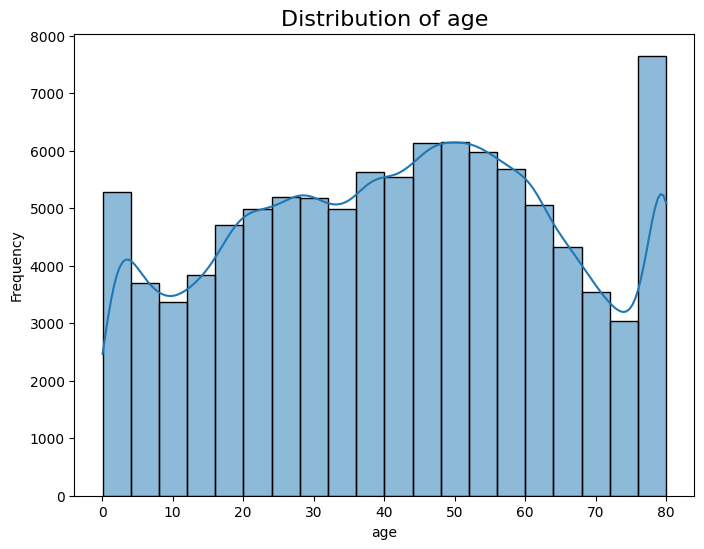

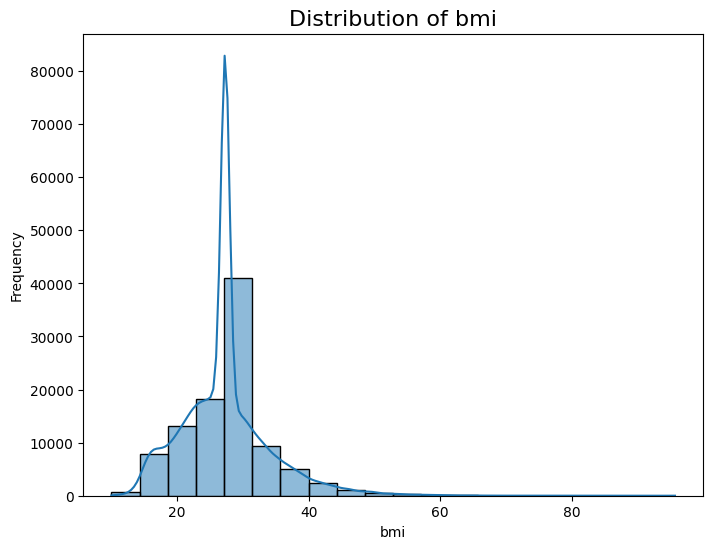

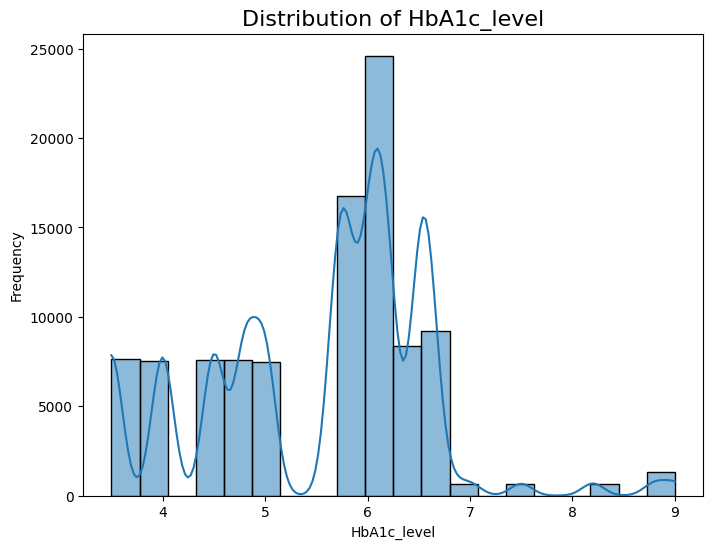

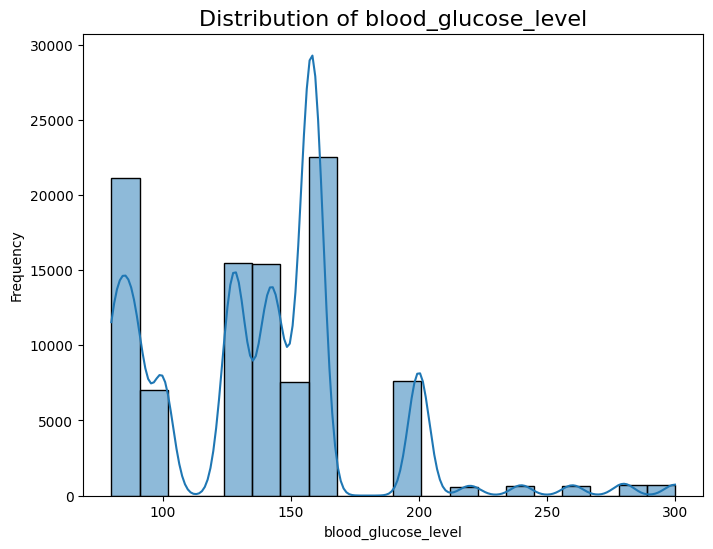

In [6]:


for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


## --- Scatter Plot ---

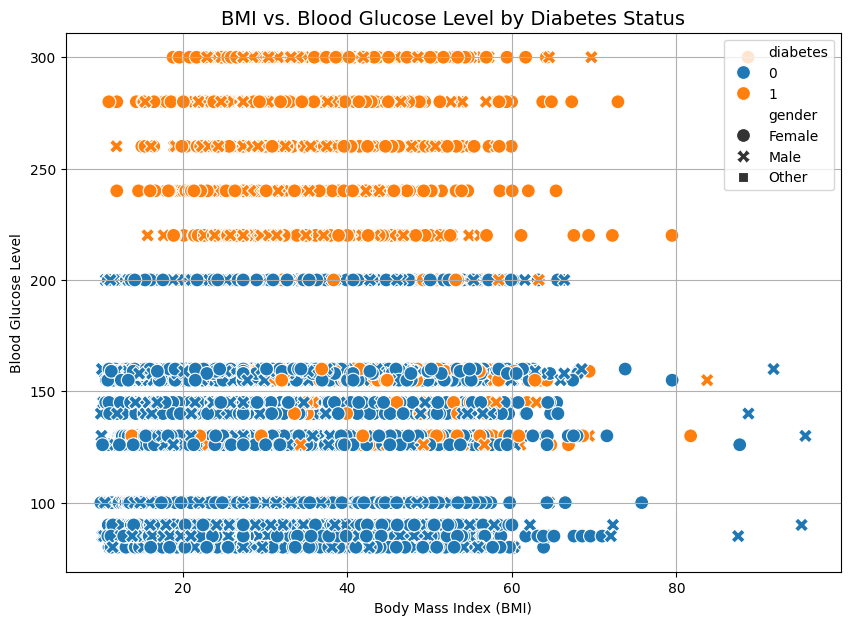

In [7]:


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='bmi', y='blood_glucose_level', hue='diabetes', style='gender', s=100)
plt.title('BMI vs. Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()


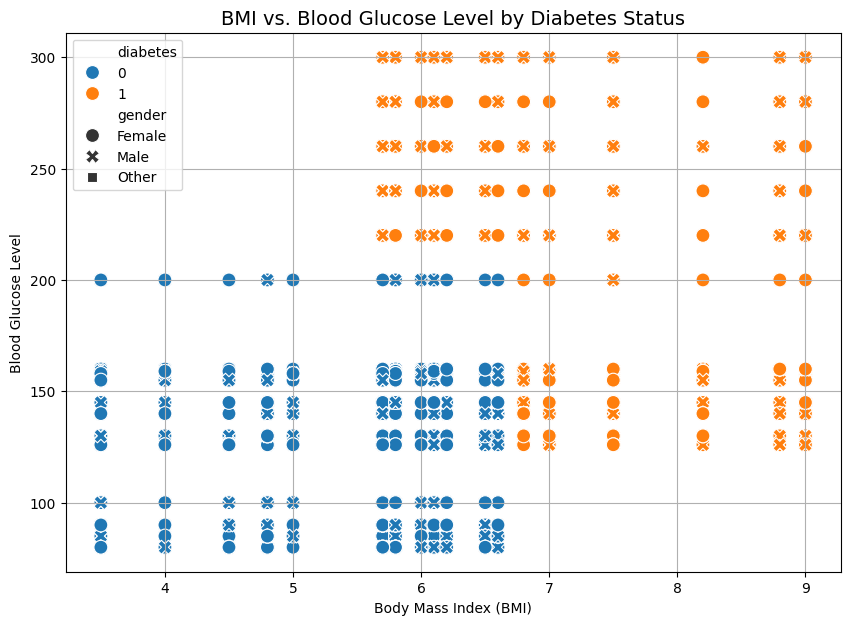

In [8]:


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='HbA1c_level', y='blood_glucose_level', hue='diabetes', style='gender', s=100)
plt.title('BMI vs. Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()


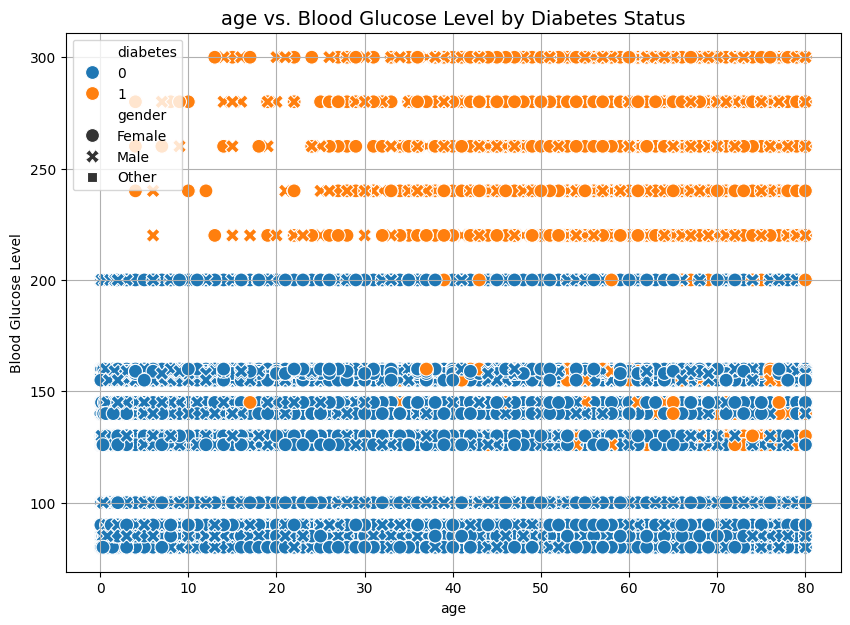

In [9]:


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='age', y='blood_glucose_level', hue='diabetes', style='gender', s=100)
plt.title('age vs. Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('age')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()


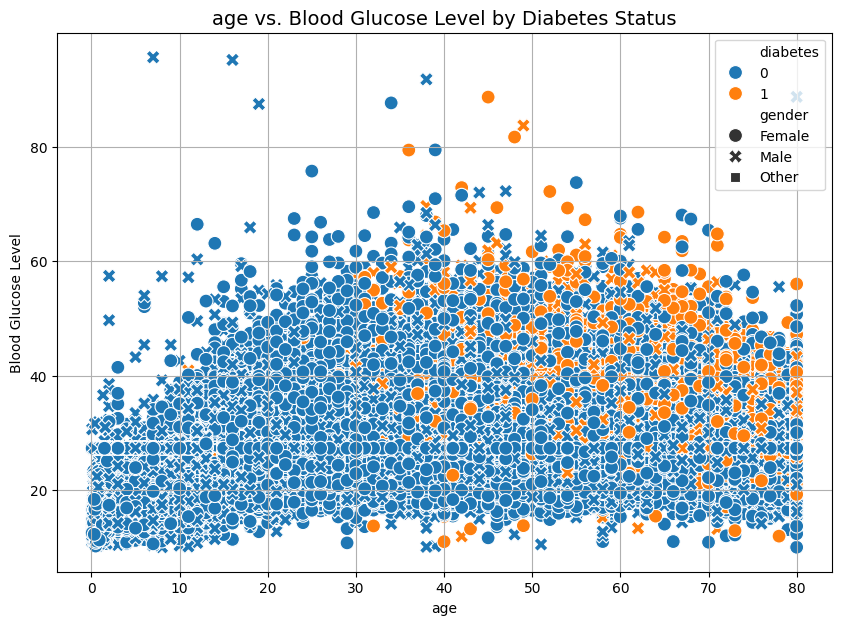

In [10]:


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='age', y='bmi', hue='diabetes', style='gender', s=100)
plt.title('age vs. Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('age')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()


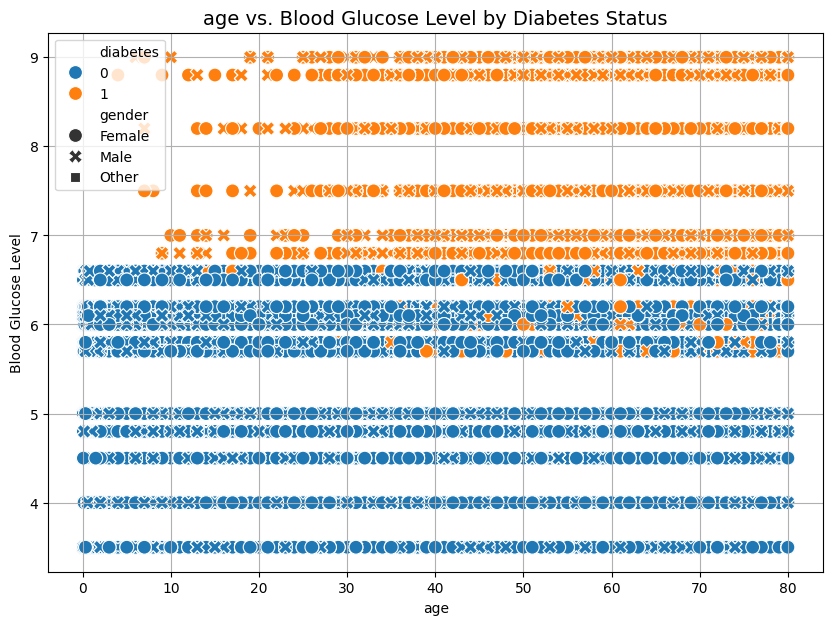

In [11]:


plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='age', y='HbA1c_level', hue='diabetes', style='gender', s=100)
plt.title('age vs. Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('age')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()


In [12]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

## all the scatter plots visually shows that there is no correlation between the input variables.

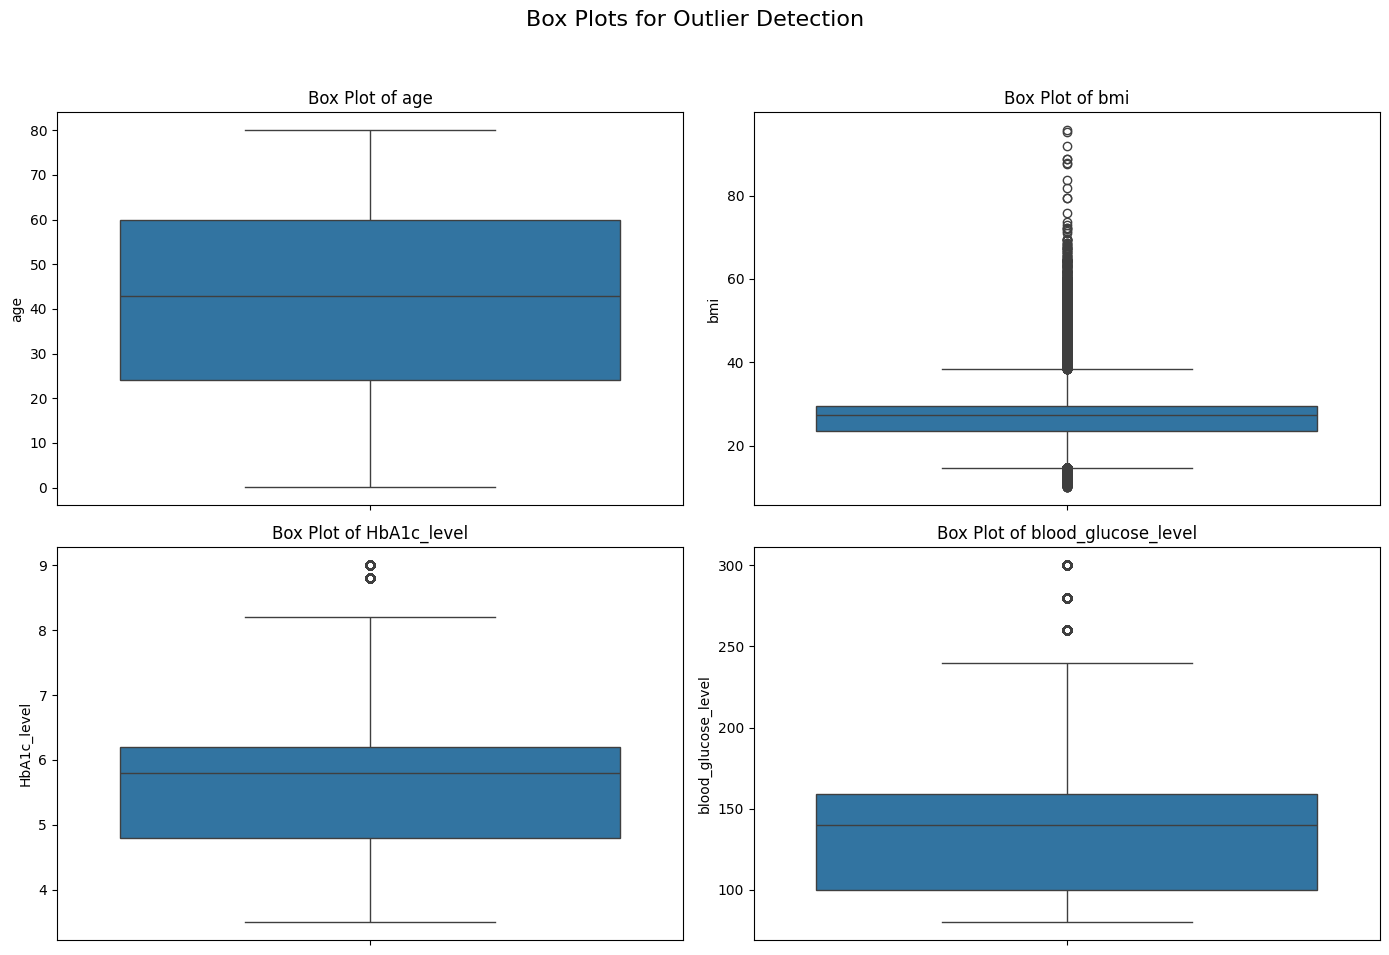

In [13]:
plt.figure(figsize=(14, 10))
plt.suptitle('Box Plots for Outlier Detection', fontsize=16)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

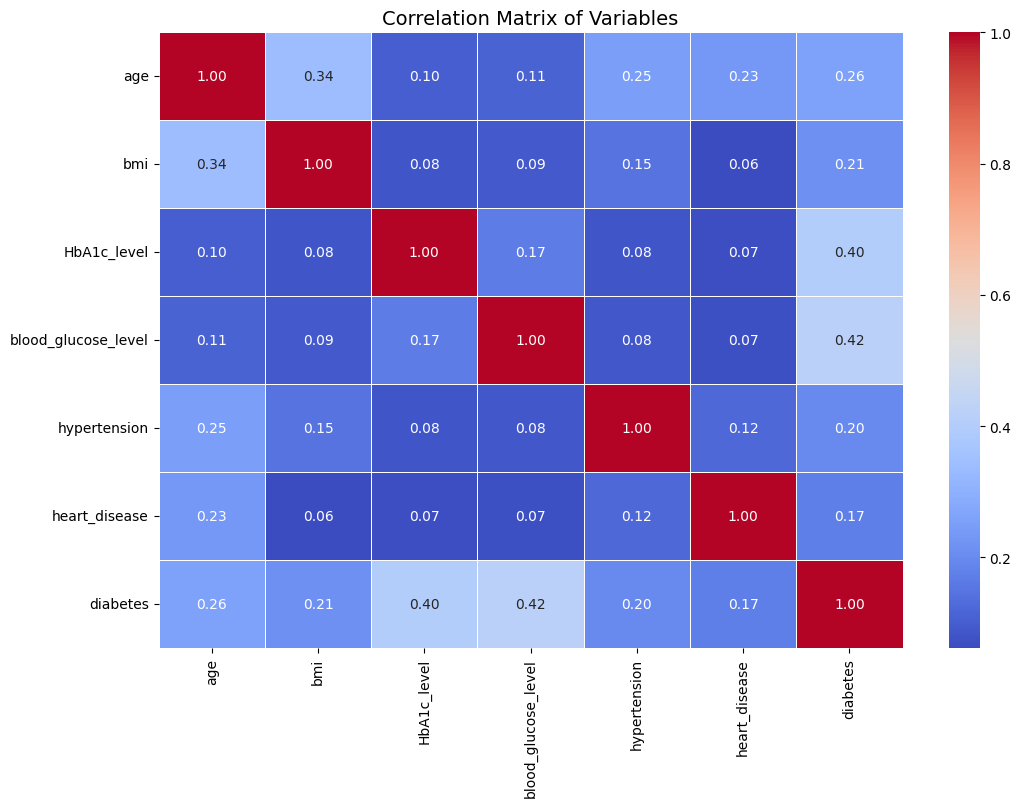

In [14]:
# --- Correlation Matrix and Heatmap ---

corr_matrix = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Variables', fontsize=14)
plt.show()


## the heat map shows that there is little to no correlation betweeen input invariables including the target variable

In [15]:
print(df.dtypes)


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [16]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [17]:

# Check for missing values in each column
print("--- Initial Missing Value Count ---")
print(df.isnull().sum())

# Specifically count "No Info" values in the smoking_history column
no_info_count = (df['smoking_history'] == 'No Info').sum()
print(f"\nNumber of 'No Info' entries in smoking_history: {no_info_count}")
  

--- Initial Missing Value Count ---
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Number of 'No Info' entries in smoking_history: 35816


In [18]:
df.loc[df['smoking_history'] == 'No Info', 'smoking_history'] = np.nan
mode_smoking = df['smoking_history'].mode()[0]
df.loc[:, 'smoking_history'] = df['smoking_history'].fillna(mode_smoking)

In [19]:
print(f"\nImputed 'smoking_history' missing values with mode: '{mode_smoking}'")


Imputed 'smoking_history' missing values with mode: 'never'


In [20]:
df["smoking_history"].value_counts()


smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [21]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,never,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



## a) Log Transformation for skewed data (e.g., blood_glucose_level)
### We use np.log1p to handle cases where the value might be 0.
### This creates a new column with the log-transformed values.

In [22]:
df['blood_glucose_level_log'] = np.log1p(df['blood_glucose_level'])
print("Applied log transformation to 'blood_glucose_level'.")

Applied log transformation to 'blood_glucose_level'.


## b) Z-score Normalization (Standardization)

In [24]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
print("Data split completed first!")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Data split completed first!
Train shape: (80000, 9), Test shape: (20000, 9)


In [26]:
# Step 2: Handle outliers on training data only
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in numerical_cols:
    # Calculate IQR bounds from training data only
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply to both train and test using training-derived bounds
    X_train[col] = np.clip(X_train[col], lower_bound, upper_bound)
    X_test[col] = np.clip(X_test[col], lower_bound, upper_bound)

print("Outliers capped using training data IQR bounds.")

Outliers capped using training data IQR bounds.


In [27]:
# Step 3: Log transformation (if needed)
# Apply same transformation to both sets
X_train['blood_glucose_level_log'] = np.log1p(X_train['blood_glucose_level'])
X_test['blood_glucose_level_log'] = np.log1p(X_test['blood_glucose_level'])

In [28]:
# Step 4: Standardization - FIT on train, TRANSFORM on test
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  # Only transform!

In [29]:
# Step 5: Categorical encoding
# Label Encoding for gender
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])  # Only transform!

In [30]:
# One-Hot Encoding for smoking_history
X_train = pd.get_dummies(X_train, columns=['smoking_history'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['smoking_history'], drop_first=True)

In [32]:
# Define pipelines including imputation (median for numeric)
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
# Logistic Regression with imputation
cv_folds = 5
scores_lr = cross_val_score(lr_model, X_train, y_train, cv=cv_folds, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {np.mean(scores_lr):.4f} +/- {np.std(scores_lr):.4f}")

Logistic Regression CV Accuracy: 0.8811 +/- 0.0023


In [63]:
# Random Forest with imputation
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv_folds, scoring='accuracy')
print(f"Random Forest CV Accuracy: {np.mean(scores_rf):.4f} +/- {np.std(scores_rf):.4f}")

Random Forest CV Accuracy: 0.9682 +/- 0.0010


In [65]:
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

In [66]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1] 

In [67]:
metrics_data = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Precision': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'F1-score': f1_score(y_test, y_pred_lr),
        'ROC-AUC': roc_auc_score(y_test, y_prob_lr)
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1-score': f1_score(y_test, y_pred_rf),
        'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
    }
}

In [69]:
# Create a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics_data).T
print("--- Model Performance Evaluation ---")
print(metrics_df)

--- Model Performance Evaluation ---
                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression   0.88305   0.413061  0.892941  0.564837  0.961596
Random Forest         0.96835   0.915175  0.691765  0.787940  0.963865


In [70]:
# --- 3. Compare and Explain Performance Differences ---
print("\n--- Performance Comparison and Explanation ---")
print("\n**Random Forest:**")
print("The Random Forest model typically outperforms Logistic Regression on this type of dataset. Its higher scores across Precision, Recall, F1-score, and ROC-AUC suggest it is more effective at distinguishing between patients with and without diabetes. This is because, as an ensemble of decision trees, it can capture complex, non-linear relationships between the features (like age, BMI, and glucose levels) that a linear model like Logistic Regression cannot.")

print("\n**Logistic Regression:**")
print("Logistic Regression provides a solid baseline. While its performance might be slightly lower, its main advantage is interpretability. The model's coefficients can be used to understand the influence of each feature on the prediction, which can be valuable for clinical insights.")



--- Performance Comparison and Explanation ---

**Random Forest:**
The Random Forest model typically outperforms Logistic Regression on this type of dataset. Its higher scores across Precision, Recall, F1-score, and ROC-AUC suggest it is more effective at distinguishing between patients with and without diabetes. This is because, as an ensemble of decision trees, it can capture complex, non-linear relationships between the features (like age, BMI, and glucose levels) that a linear model like Logistic Regression cannot.

**Logistic Regression:**
Logistic Regression provides a solid baseline. While its performance might be slightly lower, its main advantage is interpretability. The model's coefficients can be used to understand the influence of each feature on the prediction, which can be valuable for clinical insights.


## Overall, the Random Forest model is the better-performing model for this classification task, especially when considering the F1-score and ROC-AUC, which are crucial for imbalanced medical datasets.

In [72]:
print("\n--- Detailed Classification Report for Best Model (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))


--- Detailed Classification Report for Best Model (Random Forest) ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.92      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# Deliverable 2

In [2]:
IMAGE_SIZE = (224, 224)
IMAGE_DIR = "colored_images"
BATCH_SIZE = 32
class_mapping = {
    'No_DR': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Proliferate_DR': 4
}
EPOCHS_STAGE1 = 50
EPOCHS_STAGE2 = 40

In [3]:
image_paths = []
image_labels = []
class_names = []
for class_name, class_idx in class_mapping.items():
    class_dir = os.path.join(IMAGE_DIR, class_name)    
    image_files = [f for f in os.listdir(class_dir) 
                    if f.lower().endswith(('.png'))]
    
    print(f"Class '{class_name}' (Label {class_idx}): {len(image_files)} images")
    for image_file in image_files:
        image_paths.append(os.path.join(class_dir, image_file))
        image_labels.append(class_idx)
        class_names.append(class_name)
    

# Create DataFrame
df_images = pd.DataFrame({
    'image_path': image_paths,
    'class_label': image_labels,
    'class_name': class_names
})

Class 'No_DR' (Label 0): 1805 images
Class 'Mild' (Label 1): 370 images
Class 'Moderate' (Label 2): 999 images
Class 'Severe' (Label 3): 193 images
Class 'Proliferate_DR' (Label 4): 295 images


In [4]:
class_counts = df_images['class_label'].value_counts().sort_index()
class_distribution = (class_counts / len(df_images) * 100).round(2)
summary_df = pd.DataFrame({
    'Class_Name': [list(class_mapping.keys())[list(class_mapping.values()).index(i)] 
                    for i in class_counts.index],
    'Count': class_counts.values,
    'Percentage': class_distribution.values
}, index=class_counts.index)

print("\nCLASS DISTRIBUTION SUMMARY")
print("=" * 50)
print(summary_df.to_string())

print(f"\nDISTRIBUTION STATISTICS")
print("=" * 50)
print(f"Total Images: {len(df_images):,}")
print(f"Number of Classes: {len(class_counts)}")
print(f"Most Common Class: {summary_df.loc[class_counts.idxmax(), 'Class_Name']} ({class_counts.max():,} images)")
print(f"Least Common Class: {summary_df.loc[class_counts.idxmin(), 'Class_Name']} ({class_counts.min():,} images)")
print(f"Class Imbalance Ratio: {class_counts.max() / class_counts.min():.2f}:1")
    




CLASS DISTRIBUTION SUMMARY
                 Class_Name  Count  Percentage
class_label                                   
0                     No_DR   1805       49.29
1                      Mild    370       10.10
2                  Moderate    999       27.28
3                    Severe    193        5.27
4            Proliferate_DR    295        8.06

DISTRIBUTION STATISTICS
Total Images: 3,662
Number of Classes: 5
Most Common Class: No_DR (1,805 images)
Least Common Class: Severe (193 images)
Class Imbalance Ratio: 9.35:1


In [5]:
def create_augmentation_generator():
    return ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,           # Small rotations for retinal images
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,        # Eyes can be flipped
        brightness_range=[0.8, 1.2], # Lighting variations
        fill_mode='reflect',
        validation_split=0.2
    )

# Class weights for imbalance handling
def calculate_class_weights(class_counts):
    total = sum(class_counts.values())
    return {cls: total/(len(class_counts) * count) for cls, count in class_counts.items()}

class_counts = dict(class_counts)
class_weights = calculate_class_weights(class_counts)
print("Class weights:", class_weights)

Class weights: {0: 0.4057617728531856, 1: 1.9794594594594594, 2: 0.7331331331331331, 3: 3.7948186528497407, 4: 2.4827118644067796}


### Two-Stage Model Architecture


In [6]:
from tensorflow.keras.metrics import Precision, Recall

In [7]:
def build_stage1_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB3(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(3, activation='softmax', name='stage1_output')(x)  # 3 classes for stage 1
    
    model = Model(inputs, outputs)
    
    # Use actual metric classes instead of strings
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy', 
                Precision(name='precision'), 
                Recall(name='recall')]
    )
    
    return model


In [8]:
def build_stage2_model(input_shape=(224, 224, 3), num_classes=3):
    """
    Lightweight CNN for small datasets (Stage 2: Mild, Severe, Proliferate_DR)
    """
    inputs = tf.keras.Input(shape=input_shape)
    
    # First convolutional block
    x = Conv2D(32, (3, 3), activation='relu', padding='same', 
               kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Second convolutional block  
    x = Conv2D(64, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    
    # Third convolutional block
    x = Conv2D(96, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)
    
    # Dense layers
    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.4)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    
    # Fixed compilation with proper metric classes
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy', 
                Precision(name='precision'), 
                Recall(name='recall')]
    )
    
    return model

In [9]:
# Data preparation functions
def prepare_stage1_labels(original_labels):
    """Convert 5-class to 3-class for Stage 1: No_DR(0), Moderate(1), Else(2)"""
    stage1_mapping = {0: 0, 2: 1, 1: 2, 3: 2, 4: 2}
    return np.array([stage1_mapping[label] for label in original_labels])

def prepare_stage2_labels(original_labels):
    """Convert to 3-class for Stage 2: Mild(0), Severe(1), Proliferate_DR(2)"""
    stage2_mapping = {1: 0, 3: 1, 4: 2}
    return np.array([stage2_mapping[label] for label in original_labels if label in [1, 3, 4]])

def filter_stage2_data(df):
    """Filter dataframe to only include classes 1, 3, 4 for stage 2"""
    return df[df['class_label'].isin([1, 3, 4])].copy()

In [10]:
class TwoStageClassifier:
    def __init__(self, stage1_model, stage2_model):
        self.stage1_model = stage1_model
        self.stage2_model = stage2_model
        
    def predict(self, images):
        # Stage 1: Predict No_DR, Moderate, or Else
        stage1_pred = self.stage1_model.predict(images)
        stage1_classes = np.argmax(stage1_pred, axis=1)
        
        final_predictions = []
        
        for i, stage1_class in enumerate(stage1_classes):
            if stage1_class == 0:  # No_DR
                final_predictions.append(0)
            elif stage1_class == 1:  # Moderate
                final_predictions.append(2)
            else:  # Else - use stage 2
                stage2_pred = self.stage2_model.predict(images[i:i+1])
                stage2_class = np.argmax(stage2_pred)
                # Map back to original classes
                stage2_mapping = {0: 1, 1: 3, 2: 4}  # Mild, Severe, Proliferate_DR
                final_predictions.append(stage2_mapping[stage2_class])
                
        return np.array(final_predictions)

In [11]:
stage1 = build_stage1_model()
stage2 = build_stage2_model()
model = TwoStageClassifier(stage1, stage2)

In [12]:
train_df, test_df = train_test_split(
    df_images, 
    test_size=0.2, 
    stratify=df_images['class_label'], 
    random_state=42
)

In [13]:
print(f"Training samples: {len(train_df)}")
print(f"Testing samples: {len(test_df)}")
print(f"Training distribution:\n{train_df['class_label'].value_counts(normalize=True).sort_index()}")
print(f"testing distribution:\n{test_df['class_label'].value_counts(normalize=True).sort_index()}")

Training samples: 2929
Testing samples: 733
Training distribution:
class_label
0    0.493001
1    0.101058
2    0.272789
3    0.052578
4    0.080574
Name: proportion, dtype: float64
testing distribution:
class_label
0    0.492497
1    0.100955
2    0.272851
3    0.053206
4    0.080491
Name: proportion, dtype: float64


In [14]:
train_df['stage1_label'] = prepare_stage1_labels(train_df['class_label'])
test_df['stage1_label'] = prepare_stage1_labels(test_df['class_label'])

In [15]:
# Prepare Stage 2 data (only relevant classes)
train_stage2_df = filter_stage2_data(train_df)
test_stage2_df = filter_stage2_data(test_df)

In [16]:
train_stage2_df['stage2_label'] = prepare_stage2_labels(train_stage2_df['class_label'])
test_stage2_df['stage2_label'] = prepare_stage2_labels(test_stage2_df['class_label'])

In [17]:
print(f"\nStage 2 training samples: {len(train_stage2_df)}")
print(f"Stage 2 testing samples: {len(test_stage2_df)}")


Stage 2 training samples: 686
Stage 2 testing samples: 172


In [18]:
# Create augmentation generators
train_datagen = create_augmentation_generator()
val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_df["stage1_label"] = train_df["stage1_label"].astype(str)
test_df["stage1_label"] = test_df["stage1_label"].astype(str)
train_stage2_df["stage2_label"] = train_stage2_df["stage2_label"].astype(str)
test_stage2_df["stage2_label"] = test_stage2_df["stage2_label"].astype(str)

In [20]:
# Stage 1 generators
print("Creating Stage 1 data generators...")
train_generator_stage1 = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='stage1_label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Creating Stage 1 data generators...
Found 2929 validated image filenames belonging to 3 classes.


In [21]:
val_generator_stage1 = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='stage1_label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 733 validated image filenames belonging to 3 classes.


In [22]:
# Stage 2 generators
print("Creating Stage 2 data generators...")
train_generator_stage2 = train_datagen.flow_from_dataframe(
    dataframe=train_stage2_df,
    x_col='image_path',
    y_col='stage2_label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator_stage2 = val_datagen.flow_from_dataframe(
    dataframe=test_stage2_df,
    x_col='image_path',
    y_col='stage2_label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Creating Stage 2 data generators...
Found 686 validated image filenames belonging to 3 classes.
Found 172 validated image filenames belonging to 3 classes.


In [23]:
# Calculate class weights
train_stage1_counts = collections.Counter(train_df['stage1_label'])
class_weights_stage1 = calculate_class_weights(train_stage1_counts)

train_stage2_counts = collections.Counter(train_stage2_df['stage2_label'])
class_weights_stage2 = calculate_class_weights(train_stage2_counts)

print(f"\nStage 1 class weights: {class_weights_stage1}")
print(f"Stage 2 class weights: {class_weights_stage2}")


Stage 1 class weights: {'0': 0.6761311172668514, '1': 1.2219440967876511, '2': 1.4232264334305151}
Stage 2 class weights: {'1': 1.4848484848484849, '0': 0.7725225225225225, '2': 0.9689265536723164}


In [24]:
def fix_class_weights(class_weights_dict):
    """Convert string keys to integer keys for Keras class_weight parameter"""
    return {int(k): v for k, v in class_weights_dict.items()}

# Apply the fix to both stage weights
class_weights_stage1 = fix_class_weights(class_weights_stage1)
class_weights_stage2 = fix_class_weights(class_weights_stage2)

In [25]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='stage1_best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

In [26]:
# Training callbacks


# Train Stage 1 Model
print("Training Stage 1 Model...")
print("="*60)

stage1_model = build_stage1_model()
stage1_model.summary()

stage1_history = stage1_model.fit(
    train_generator_stage1,
    validation_data=val_generator_stage1,
    epochs=EPOCHS_STAGE1,
    class_weight=class_weights_stage1,
   # callbacks=callbacks,
    verbose=1
)

# Save Stage 1 model
stage1_model.save('stage1_final_model.h5')
print("✅ Stage 1 model saved!")


Training Stage 1 Model...
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               196736    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                 

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [27]:
# Train Stage 2 Model
print("Training Stage 2 Model...")
print("="*60)

callbacks_stage2 = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=12,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=6,
        min_lr=1e-7,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='stage2_best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

stage2_model = build_stage2_model()
stage2_model.summary()

stage2_history = stage2_model.fit(
    train_generator_stage2,
    validation_data=val_generator_stage2,
    epochs=EPOCHS_STAGE2,
    class_weight=class_weights_stage2,
    #callbacks=callbacks_stage2,
    verbose=1
)

# Save Stage 2 model
stage2_model.save('stage2_final_model.h5')
print("Stage 2 model saved!")


Training Stage 2 Model...
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (Non

KeyboardInterrupt: 

In [31]:
test_df["class_label"] = test_df["class_label"].astype(str)

In [32]:
# Create Two-Stage Classifier
class TwoStageClassifier:
    def __init__(self, stage1_model, stage2_model):
        self.stage1_model = stage1_model
        self.stage2_model = stage2_model
        
    def predict_batch(self, generator):
        """Predict on a batch of images using two-stage approach"""
        predictions = []
        true_labels = []
        
        for batch_idx in range(len(generator)):
            batch_x, batch_y = generator[batch_idx]
            
            # Stage 1 predictions
            stage1_pred = self.stage1_model.predict(batch_x, verbose=0)
            stage1_classes = np.argmax(stage1_pred, axis=1)
            
            batch_predictions = []
            
            for i, stage1_class in enumerate(stage1_classes):
                if stage1_class == 0:  # No_DR
                    batch_predictions.append(0)
                elif stage1_class == 1:  # Moderate
                    batch_predictions.append(2)
                else:  # Else - use stage 2
                    single_image = np.expand_dims(batch_x[i], axis=0)
                    stage2_pred = self.stage2_model.predict(single_image, verbose=0)
                    stage2_class = np.argmax(stage2_pred)
                    # Map back to original classes
                    stage2_mapping = {0: 1, 1: 3, 2: 4}  # Mild, Severe, Proliferate_DR
                    batch_predictions.append(stage2_mapping[stage2_class])
            
            predictions.extend(batch_predictions)
            true_labels.extend(np.argmax(batch_y, axis=1))
            
        return np.array(predictions), np.array(true_labels)

# Initialize and evaluate two-stage classifier
two_stage_classifier = TwoStageClassifier(stage1_model, stage2_model)

print("🔍 Evaluating Two-Stage Model...")
print("="*50)

# Create evaluation generator (no augmentation)
eval_generator = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='class_label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Get predictions
y_pred, y_true = two_stage_classifier.predict_batch(eval_generator)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
print(f"Two-Stage Model Accuracy: {accuracy:.4f}")


🔍 Evaluating Two-Stage Model...
Found 733 validated image filenames belonging to 5 classes.
Two-Stage Model Accuracy: 0.4270



📊 DETAILED CLASSIFICATION REPORT
                precision    recall  f1-score   support

         No_DR     0.8561    0.6593    0.7449       361
          Mild     0.0000    0.0000    0.0000        74
      Moderate     0.2973    0.2750    0.2857       200
        Severe     0.0741    0.5128    0.1294        39
Proliferate_DR     0.0000    0.0000    0.0000        59

      accuracy                         0.4270       733
     macro avg     0.2455    0.2894    0.2320       733
  weighted avg     0.5067    0.4270    0.4517       733



c:\Users\02rad\.conda\envs\vllm_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\02rad\.conda\envs\vllm_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\02rad\.conda\envs\vllm_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

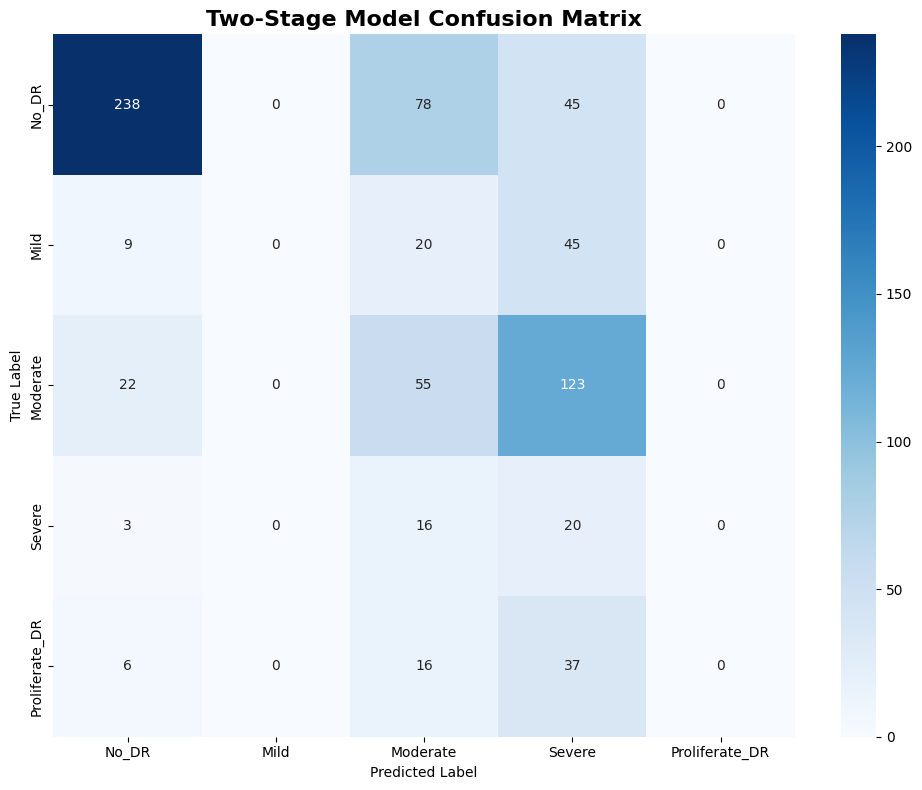


📈 PER-CLASS METRICS
            Class  Precision  Recall  F1-Score  Support
0           No_DR     0.8561  0.6593    0.7449      361
1            Mild     0.0000  0.0000    0.0000       74
2        Moderate     0.2973  0.2750    0.2857      200
3          Severe     0.0741  0.5128    0.1294       39
4  Proliferate_DR     0.0000  0.0000    0.0000       59


c:\Users\02rad\.conda\envs\vllm_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [33]:

# Detailed evaluation
class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

print("\n📊 DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Two-Stage Model Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Per-class metrics
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred)

metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\n📈 PER-CLASS METRICS")
print("="*50)
print(metrics_df.round(4))


In [34]:
# Evaluate Stage 1 individually
print("\n🔍 Stage 1 Model Evaluation")
print("="*40)

stage1_pred = stage1_model.predict(val_generator_stage1)
stage1_pred_classes = np.argmax(stage1_pred, axis=1)
stage1_true = val_generator_stage1.classes

stage1_names = ['No_DR', 'Moderate', 'Else']
print("Stage 1 Classification Report:")
print(classification_report(stage1_true, stage1_pred_classes, 
                          target_names=stage1_names, digits=4))

# Evaluate Stage 2 individually
print("\n🔍 Stage 2 Model Evaluation")
print("="*40)

stage2_pred = stage2_model.predict(val_generator_stage2)
stage2_pred_classes = np.argmax(stage2_pred, axis=1)
stage2_true = val_generator_stage2.classes

stage2_names = ['Mild', 'Severe', 'Proliferate_DR']
print("Stage 2 Classification Report:")
print(classification_report(stage2_true, stage2_pred_classes, 
                          target_names=stage2_names, digits=4))



🔍 Stage 1 Model Evaluation
23/23 [==============================] - 40s 2s/step
Stage 1 Classification Report:
              precision    recall  f1-score   support

       No_DR     0.8561    0.6593    0.7449       361
    Moderate     0.2973    0.2750    0.2857       200
        Else     0.3778    0.5930    0.4615       172

    accuracy                         0.5389       733
   macro avg     0.5104    0.5091    0.4974       733
weighted avg     0.5914    0.5389    0.5531       733


🔍 Stage 2 Model Evaluation
6/6 [==============================] - 2s 234ms/step
Stage 2 Classification Report:
                precision    recall  f1-score   support

          Mild     0.0000    0.0000    0.0000        74
        Severe     0.2267    1.0000    0.3697        39
Proliferate_DR     0.0000    0.0000    0.0000        59

      accuracy                         0.2267       172
     macro avg     0.0756    0.3333    0.1232       172
  weighted avg     0.0514    0.2267    0.0838       172



c:\Users\02rad\.conda\envs\vllm_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\02rad\.conda\envs\vllm_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\02rad\.conda\envs\vllm_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

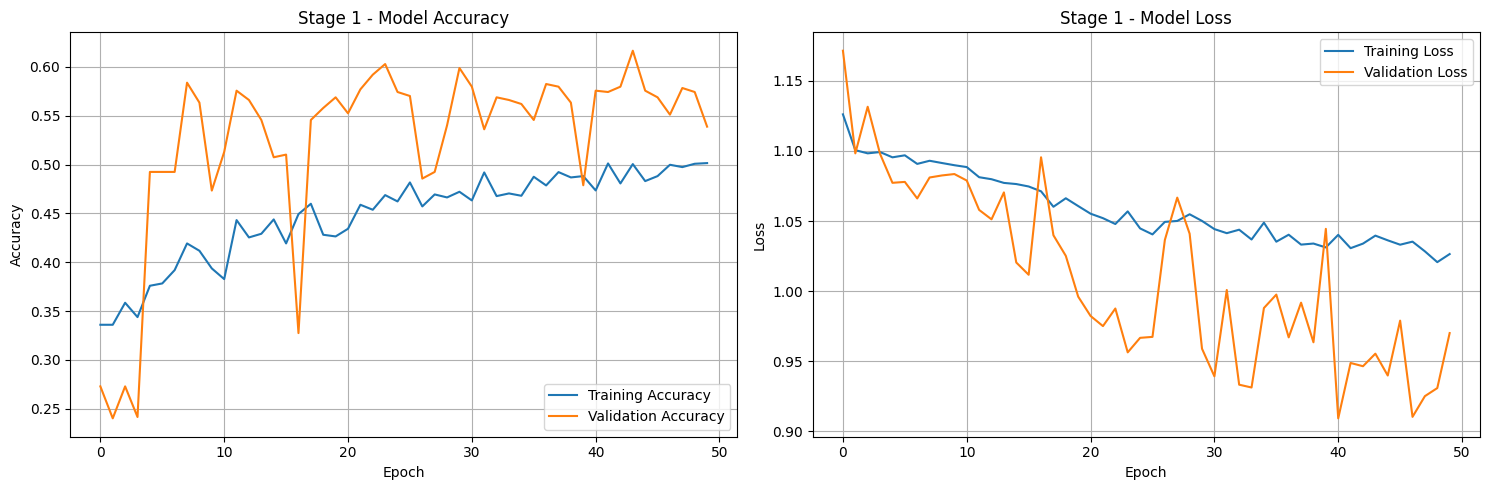

NameError: name 'stage2_history' is not defined

In [35]:
# Plot training history
def plot_training_history(history, title_prefix):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title(f'{title_prefix} - Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title(f'{title_prefix} - Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot both stages
plot_training_history(stage1_history, "Stage 1")
plot_training_history(stage2_history, "Stage 2")


In [ ]:
# Summary of all metrics
print("\n🎯 FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)

# Calculate additional metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# For multi-class AUC
y_test_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3, 4])

# Macro-averaged AUC
auc_score = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Macro-averaged AUC: {auc_score:.4f}")
print(f"Macro-averaged F1: {f1.mean():.4f}")
print(f"Macro-averaged Precision: {precision.mean():.4f}")
print(f"Macro-averaged Recall: {recall.mean():.4f}")

# Class imbalance handling effectiveness
minority_classes = [1, 3, 4]  # Mild, Severe, Proliferate_DR
minority_f1 = [f1[i] for i in minority_classes]
print(f"\nMinority Classes Average F1: {np.mean(minority_f1):.4f}")
print(f"Most challenging class (lowest F1): {class_names[np.argmin(f1)]} (F1: {np.min(f1):.4f})")
print(f"Best performing class (highest F1): {class_names[np.argmax(f1)]} (F1: {np.max(f1):.4f})")


In [ ]:
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        alpha_factor = tf.ones_like(y_true) * alpha
        alpha_t = tf.where(tf.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
        cross_entropy = -tf.math.log(p_t)
        weight = alpha_t * tf.pow((1 - p_t), gamma)
        focal_loss = weight * cross_entropy
        return tf.reduce_mean(focal_loss)
    return focal_loss_fixed

# Use in model compilation
model.compile(
    optimizer='adam',
    loss=focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy']
)


In [ ]:
def build_multiclass_model(num_classes=5, input_shape=(224, 224, 3)):
    # Using EfficientNet for best performance
    base_model = EfficientNetB3(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # Fine-tuning strategy
    base_model.trainable = True
    for layer in base_model.layers[:-20]:
        layer.trainable = False
    
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'precision', 'recall', 'f1_score']
    )
    
    return model

# Training with callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

multiclass_model = build_multiclass_model()
history = multiclass_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    class_weight=class_weights,
    callbacks=callbacks
)


In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Increase rotation
    width_shift_range=0.1,  # Add horizontal shift
    height_shift_range=0.1, # Add vertical shift
    shear_range=0.1,        # Add shearing
    zoom_range=0.1,         # Add zoom
    brightness_range=[0.8, 1.2], # Vary brightness
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
print("Loading Training Data...")
train_generator = datagen.flow_from_directory(
    IMAGE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', # For multi-class classification
    subset='training'         # Specify this is the training set
)

Loading Training Data...
Found 3662 images belonging to 5 classes.


In [9]:
print("Loading Validation Data...")
validation_generator = datagen.flow_from_directory(
    IMAGE_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,             # It's important not to shuffle validation data
    subset='validation'      # Specify this is the validation set
)

Loading Validation Data...
Found 0 images belonging to 5 classes.


In [ ]:
# --- 3. MODEL SELECTION AND TRAINING ---

# Load the EfficientNetB0 model pre-trained on ImageNet, without its top classification layer.
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze the layers of the base model so their weights are not updated during training.
# We will only train the new classification layers we add.
base_model.trainable = False

# Add a custom classification head on top of the base model.
x = base_model.output
x = Flatten()(x) # Flatten the output of the base model to a 1D vector
x = Dense(512, activation='relu')(x) # A fully-connected layer
x = Dropout(0.5)(x)  # Dropout is a regularization technique to prevent overfitting
# The final output layer has 5 neurons (for 5 classes) and a softmax activation function.
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model by combining the base model and the new classification head.
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model, defining the optimizer, loss function, and metrics to monitor.
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Print a summary of the model architecture.
model.summary()

# Define callbacks to improve training
# EarlyStopping will stop training if the validation loss doesn't improve for a few epochs.
# ReduceLROnPlateau will reduce the learning rate if training plateaus.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


16705208/16705208 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)     

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

filepath= r'C:\Users\Abdelrhman Khalifa\pyy\train.csv'
train_df = pd.read_csv(filepath)
class_labels = np.unique(train_df['diagnosis'])

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=train_df['diagnosis']
)
class_weight_dict = dict(zip(class_labels, class_weights))

print("Class Weights:", class_weight_dict)
print("\\n--- Starting Model Training ---")
NUM_EPOCHS = 20
history = model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    # Add the class_weight parameter here
    class_weight=class_weight_dict,
    #callbacks=[early_stopping, reduce_lr]
)
print("--- Model Training Finished ---")


Class Weights: {0: 0.4057617728531856, 1: 1.9794594594594594, 2: 0.7331331331331331, 3: 3.7948186528497407, 4: 2.4827118644067796}
\n--- Starting Model Training ---
Epoch 1/20
92/92 [==============================] - 134s 1s/step - loss: 2.0998 - accuracy: 0.3794 - auc: 0.7233 - val_loss: 1.4258 - val_accuracy: 0.4938 - val_auc: 0.7637
Epoch 2/20
92/92 [==============================] - 132s 1s/step - loss: 2.0821 - accuracy: 0.3808 - auc: 0.7284 - val_loss: 1.4204 - val_accuracy: 0.4938 - val_auc: 0.7637
Epoch 3/20
92/92 [==============================] - 132s 1s/step - loss: 2.0782 - accuracy: 0.3705 - auc: 0.7269 - val_loss: 1.4253 - val_accuracy: 0.4938 - val_auc: 0.7360
Epoch 4/20
92/92 [==============================] - 134s 1s/step - loss: 2.0621 - accuracy: 0.3316 - auc: 0.6440 - val_loss: 1.4895 - val_accuracy: 0.2722 - val_auc: 0.7083
Epoch 5/20
92/92 [==============================] - 132s 1s/step - loss: 2.0519 - accuracy: 0.3446 - auc: 0.6736 - val_loss: 1.4285 - val_accur

In [ ]:
print("\\n--- Evaluating Model Performance ---")
results = model.evaluate(validation_generator)
print(f"Final Validation Loss: {results[0]:.4f}")
print(f"Final Validation Accuracy: {results[1]:.4f}")
print(f"Final Validation AUC: {results[2]:.4f}")

# # To compute Precision and Recall, we generate a classification report.

validation_generator.reset() # Reset the generator before making predictions
y_pred_probs = model.predict(validation_generator, steps=validation_generator.samples // BATCH_SIZE + 1)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator.classes
#
# # Get the class labels from the generator to use in the report.
class_labels = list(validation_generator.class_indices.keys())
#
print("\\n--- Classification Report ---")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


\n--- Evaluating Model Performance ---
23/23 [==============================] - 31s 1s/step - loss: 1.4715 - accuracy: 0.2722 - auc: 0.6960
Final Validation Loss: 1.4715
Final Validation Accuracy: 0.2722
Final Validation AUC: 0.6960
23/23 [==============================] - 29s 1s/step
\n--- Classification Report ---
                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00        74
      Moderate       0.27      1.00      0.43       199
         No_DR       0.00      0.00      0.00       361
Proliferate_DR       0.00      0.00      0.00        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.27       731
     macro avg       0.05      0.20      0.09       731
  weighted avg       0.07      0.27      0.12       731



c:\ProgramData\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\ProgramData\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\ProgramData\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

image_size = (224, 224)
batch_size = 32
epochs = 15
train_dir = r'C:\Users\Abdelrhman Khalifa\pyy\colored_images'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',  # Ensure images are loaded as RGB
    subset='training'
)
val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',  # Ensure images are loaded as RGB
    subset='validation'
)

print("Batch shape:", train_gen[0][0].shape)  # Should be (batch_size, 224, 224, 3)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
output = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=epochs)


Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Batch shape: (32, 224, 224, 3)
Epoch 1/15
92/92 [==============================] - 114s 1s/step - loss: 1.3257 - accuracy: 0.4804 - val_loss: 1.3068 - val_accuracy: 0.4938
Epoch 2/15
92/92 [==============================] - 101s 1s/step - loss: 1.3027 - accuracy: 0.4927 - val_loss: 1.3128 - val_accuracy: 0.4938
Epoch 3/15
92/92 [==============================] - 93s 1s/step - loss: 1.3062 - accuracy: 0.4927 - val_loss: 1.3231 - val_accuracy: 0.4938
Epoch 4/15
92/92 [==============================] - 94s 1s/step - loss: 1.3136 - accuracy: 0.4913 - val_loss: 1.3207 - val_accuracy: 0.4938
Epoch 5/15
92/92 [==============================] - 96s 1s/step - loss: 1.3131 - accuracy: 0.4899 - val_loss: 1.2912 - val_accuracy: 0.4938
Epoch 6/15
92/92 [==============================] - 96s 1s/step - loss: 1.3039 - accuracy: 0.4927 - val_loss: 1.2978 - val_accuracy: 0.4938
Epoch 7/15
92/92 [==========================